## Final Module 1 Project Submission

* Student name: **AAAAAAAAlex Black**
* Student pace: **Full Time**
* Scheduled project review date/time: **3/8/19 at 1:00PM EST**
* Instructor name: **Brandon Lewis**
* Blog post URL: **https://blackdatasolutions.github.io/module_1_project_blog_post**


# Approach to this project through OSEMN framework

As I began this project, I divided it up into roughly 5 steps: obtain, scrub, explore, model, and interpret. Obtaining the data in this project was easy as the csv was provided directly to us. After importing the csv as a dataframe using pandas, I began the preprocessing the data to prepare it for analysis. This consisted of making sure all of the columns were in the appropriate datatype and handling null/Nan values. 

<br> The preprocessing stage quickly blended into the exploratory stage. As I began exploring different potential predictors for price, I found that some of my continuous variables had multicollinearity, others weren't continuous variables at all, and many lacked the normal distribution necessary for meeting linear regression assumptions. These discoveries necessitated additional preprocessing such as binning categorical data and transforming both indepdendent and dependent variables. 

<br> Finally, I began the modelling process. I started by running linear regressions for each of the predictors independently. This gave me an idea of what the best predictors would be, and what to prioritize moving forward. However, as I executed recursive feature elimination and train-test-split of the data, I found that the optimal model included all of the predictors I had chosen during exploration and single-regression modeling. After ensuring the results were legitimate through train-test-split and 10-fold cross validation, I arrived at a final model for estimating the price of a home given 24 predictors. The model achieved an R^2 of .588.

# <font color='red'> Obtaining the Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import math

In [2]:
# Putting data into df from csv
df = pd.read_csv('kc_house_data.csv')
print(df.info())
df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


# <font color='red'> Scrubbing the Data</font>
## Checking for Null values and Resolving them

Below, I check for all NaN values in the database, and sum them by column



In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Alright, it looks like we have some null values to deal with in the waterfront, view, and yr_renovated columns.

**waterfront:** Here, the NaN probably means that the property is NOT a waterfront property. As such, I will replace all NaN values with 0s. 

**yr_renovated:** Here, I'm going to assume that if yr_renovated is a NaN value, the house has never been renovated. The best way to deal with this is to create an entirely new column called "was_renovated". Upon further investigation of the column, it appears that there are a lot of 0's as well. If the house has a NaN value or a 0 value in yr_renovated, then it will show us as a 0 in the was_renovated column. Otherwise, it will appear as a 1 in the was_renovated column to indicate that the house has indeed been renovated.  

**view:** Similar to waterfront, I will replace all NaN values with 0 as I assume they represent the same thing. 

In [4]:
# Handling waterfront first, replacing NaNs with 0s

df['waterfront'].fillna(0, inplace=True)

# Checking it worked
df['waterfront'].isna().sum()

0

In [5]:
df['yr_renovated']


0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          NaN
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          NaN
24          0.0
25          0.0
26          NaN
27          0.0
28          NaN
29          0.0
          ...  
21567       0.0
21568       0.0
21569       0.0
21570       0.0
21571       0.0
21572       0.0
21573       0.0
21574       0.0
21575       NaN
21576       NaN
21577       NaN
21578       0.0
21579       NaN
21580       0.0
21581       NaN
21582       0.0
21583       NaN
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590       0.0
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Leng

In [6]:
# yr_renovated next, using apply and a function to clarify

# First, we'll convert all NaNs to zeros just as we did above since they mean the same thing.

df['yr_renovated'].fillna(0, inplace=True)

# Checking it worked
df['yr_renovated'].isna().sum()

#Now we create our new column using df.loc

df.loc[df["yr_renovated"] == 0, "was_renovated"] = 0
df.loc[df["yr_renovated"] > 0, "was_renovated"] = 1

df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [7]:
# Just double checking that we didn't miss any values in our new was_renovated column

df['was_renovated'].isna().sum()

0

In [8]:
# Finally, we'll handle view the same way we handled waterfront

df['view'].fillna(0, inplace=True)

# Checking it worked
df['view'].isna().sum()

0

In [9]:
# Final check that we've removed values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
was_renovated    21597 non-null float64
dtypes: float64(9), int64(11), obje

# Ensuring Correct Datatype

Looking at our .info(), now all of our variables are stored as integers or floats, with the exception of Date and sqft_basement. Clearly sqft_basement should be represented as an integer or float, but it is currently a string. Additionally, the date should be a datetime object for use of built in methods that will be helpful later.

After searching through the head of the df, we can see that several houses have the string "?" as their sqft_basement. Let's count them and see what to do with them.

In [11]:
print(df.loc[df["sqft_basement"] == '?'].count())
print(df.loc[df["sqft_basement"] == '0.0'].count())

id               454
date             454
price            454
bedrooms         454
bathrooms        454
sqft_living      454
sqft_lot         454
floors           454
waterfront       454
view             454
condition        454
grade            454
sqft_above       454
sqft_basement    454
yr_built         454
yr_renovated     454
zipcode          454
lat              454
long             454
sqft_living15    454
sqft_lot15       454
was_renovated    454
dtype: int64
id               12826
date             12826
price            12826
bedrooms         12826
bathrooms        12826
sqft_living      12826
sqft_lot         12826
floors           12826
waterfront       12826
view             12826
condition        12826
grade            12826
sqft_above       12826
sqft_basement    12826
yr_built         12826
yr_renovated     12826
zipcode          12826
lat              12826
long             12826
sqft_living15    12826
sqft_lot15       12826
was_renovated    12826
dtype: int64


We can see that there's only 454 instances of houses with a "?" in the sqft_basement column. There are also 12,826 with 0 entered as the value for the basement. For now, I will assume that the ? basements are equal to 0. Then, I'll change the type of the column from string to float.

In [12]:
df.loc[df["sqft_basement"] == '?', "sqft_basement"] = 0

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype("float64")

In [14]:
# Check to make sure everything is working

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
was_renovated    21597 non-null float64
dtypes: float64(10), int64(11), ob

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [15]:
# Now to convert the date into a datetime object

# First we'll preview to make sure it looks right
pd.to_datetime(df['date'], format='%m/%d/%Y').head()

# Then go ahead and do it to entire column
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


Looking at our data, it might be helpful to have a "yr_sold" column so that we can do some calculations on differences between yr_built, yr_renovated, and yr_sold. I create that column below. Then, I calculate the house_age_at_sale by subtracting yr_built from yr_sold.


In [16]:
# Creating yr_sold column
df['yr_sold'] = df['date'].dt.year

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015


In [18]:
# Creating house_age_at_sale column
df['house_age_at_sale'] = df['yr_sold'] - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                   21597 non-null int64
date                 21597 non-null datetime64[ns]
price                21597 non-null float64
bedrooms             21597 non-null int64
bathrooms            21597 non-null float64
sqft_living          21597 non-null int64
sqft_lot             21597 non-null int64
floors               21597 non-null float64
waterfront           21597 non-null float64
view                 21597 non-null float64
condition            21597 non-null int64
grade                21597 non-null int64
sqft_above           21597 non-null int64
sqft_basement        21597 non-null float64
yr_built             21597 non-null int64
yr_renovated         21597 non-null float64
zipcode              21597 non-null int64
lat                  21597 non-null float64
long                 21597 non-null float64
sqft_living15        21597 non-null int64
sqft_lot15           215

# <font color='red'>Exploring the Data

# <font color='green'> Question 0: </font> Before beginning to analyze any of our continuous or categorical data, let's map the data! What can we learn from a map of the houses sold?

In [20]:
# Importing folium
import folium
from folium import plugins

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [22]:
m = folium.Map([47.5112, -122.257], zoom_start=11)
m

In [23]:
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#000000",
                        fill=True# divvy color
                       ).add_to(m)
m.save('map.html')

In [24]:
houseArr = df[['lat', 'long']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(houseArr, radius=10))
m.save('map.html')

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
# Getting quarter information so I can split up DF by house prices
df['price'].describe()


count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [26]:
Q1_priced_houses = df.loc[df['price'] < 322000]
Q2_priced_houses = df.loc[(df['price'] >= 322000) & (df['price'] < 450000)]
Q3_priced_houses = df.loc[(df['price'] >= 450000) & (df['price'] < 645000)]
Q4_priced_houses = df.loc[df['price'] >= 645000]

In [27]:
m2 = folium.Map([47.5112, -122.257], zoom_start=10.5)
m2

In [28]:
# Creating color coded dots for different quarters of house prices
for index, row in Q1_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#001be5",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q2_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#8000d8",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q3_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#cb008c",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)    
for index, row in Q4_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#bf0300",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)  
m2.save('color_map.html')

In [29]:
m3 = folium.Map([47.5112, -122.257], zoom_start=10.5)


In [30]:
# Creating color coded dots for different quarters of house prices
for index, row in Q1_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#060063",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m3)
for index, row in Q2_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#42d6ff",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m3)

In [31]:
m3.save('below_median_map.html')

In [32]:
m4 = folium.Map([47.5112, -122.257], zoom_start=10.0)
m4

In [33]:
for index, row in Q3_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#ff7f35",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m4)    
for index, row in Q4_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#bf0300",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m4)  

In [34]:
m4.save('above_median_map.html')

# <font color='green'> Question 0 ANSWER: </font> The color-coded map shows us a lot of good information. Unsurprisingly, expensive houses are generally clustered in certain neighborhoods, and real estate begins to get cheaper as you move either North or South of Seattle, but stays expensive to the East of Seattle. The most affordable homes appear to be located in the area in between Tacoma and Seattle. <br><br> This map also acts as a way for potential buyers/sellers to explore prices in different areas. Folium's "popup" feature allowed me to incorporate each home's price, square footage, and bedrooms. The user simply has to click on a home and the information will popup. <br><br> This map could also be used to show homes in within a certain budget by modifying the database price range that is applied to the map. 

# <font color='green'> Question 1: </font> Before any variable transformation or scaling, which variables appear to have the highest correlation with price? Which categorical variables appear to be the most relevant to price?

Here- I start with intuition. Before doing any EDA, I believed that sqft_living, house_age_at_sale, yr_sold, and bathrooms would be the biggest predictors of price. I insert those columns into a "mini_df" and then look at their correlations with price. I chose these variables because I thought they were "continuous"-ish variables and I originally planned on running them as continuous variables. Later after further analysis, I determine that some of them are better off as binned categories.

In [35]:
mini_df = df.loc[:,['price', 'sqft_living', 'house_age_at_sale', 'yr_sold', 'bathrooms']]
mini_df.head()

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
0,221900.0,1180,59,2014,1.00
1,538000.0,2570,63,2014,2.25
2,180000.0,770,82,2015,1.00
3,604000.0,1960,49,2014,3.00
4,510000.0,1680,28,2015,2.00


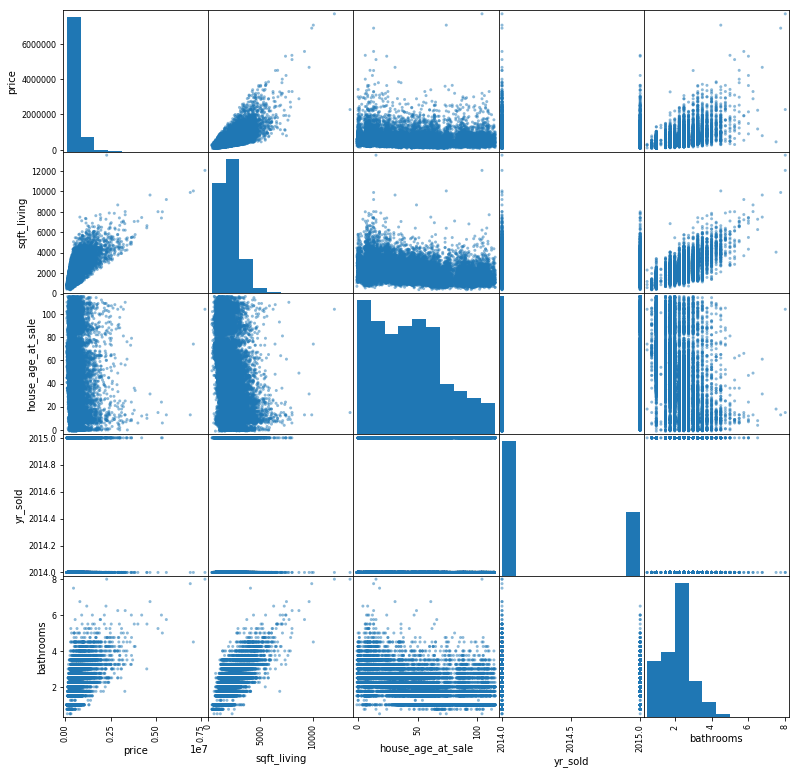

In [36]:
# First, we'll get a look at some predictors! Note these are the predictors that I thought would have the highest 
# correlation with price

pd.plotting.scatter_matrix(mini_df,figsize  = [13, 13]);

Text(0, 0.5, 'Price')

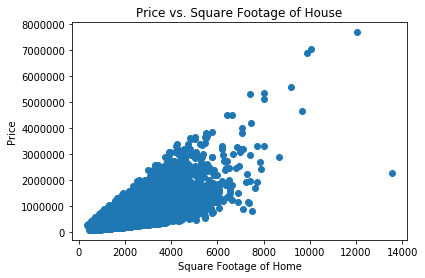

In [37]:
plt.scatter(mini_df['sqft_living'],mini_df['price'])
plt.title("Price vs. Square Footage of House")
plt.xlabel("Square Footage of Home")
plt.ylabel("Price")

This is great! Looking like a highly linear relationship between price and sqft_living

In [38]:
mini_df.corr()

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
price,1.000000,0.701917,-0.053890,0.003727,0.525906
sqft_living,0.701917,1.000000,-0.318592,-0.029014,0.755758
house_age_at_sale,-0.053890,-0.318592,1.000000,0.012344,-0.507561
yr_sold,0.003727,-0.029014,0.012344,1.000000,-0.026577
bathrooms,0.525906,0.755758,-0.507561,-0.026577,1.000000


In [39]:
abs(mini_df.corr())>0.75

,price,sqft_living,house_age_at_sale,yr_sold,bathrooms
price,True,False,False,False,False
sqft_living,False,True,False,False,True
house_age_at_sale,False,False,True,False,False
yr_sold,False,False,False,True,False
bathrooms,False,True,False,False,True


Sqft_living has a high correlation, but none of the other variables really do. 

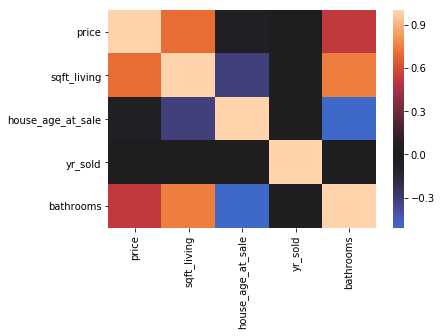

In [40]:
import seaborn as sns
sns.heatmap(mini_df.corr(), center=0);

Here, we'll do our first EDA over some of the categorical variables, even though they have not been binned or organized yet. We'll create another "mini_df2" to reduce the noise on this analysis

In [41]:
# Let's look at even more variables
mini_df2 = df.iloc[:,:12]
mini_df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8


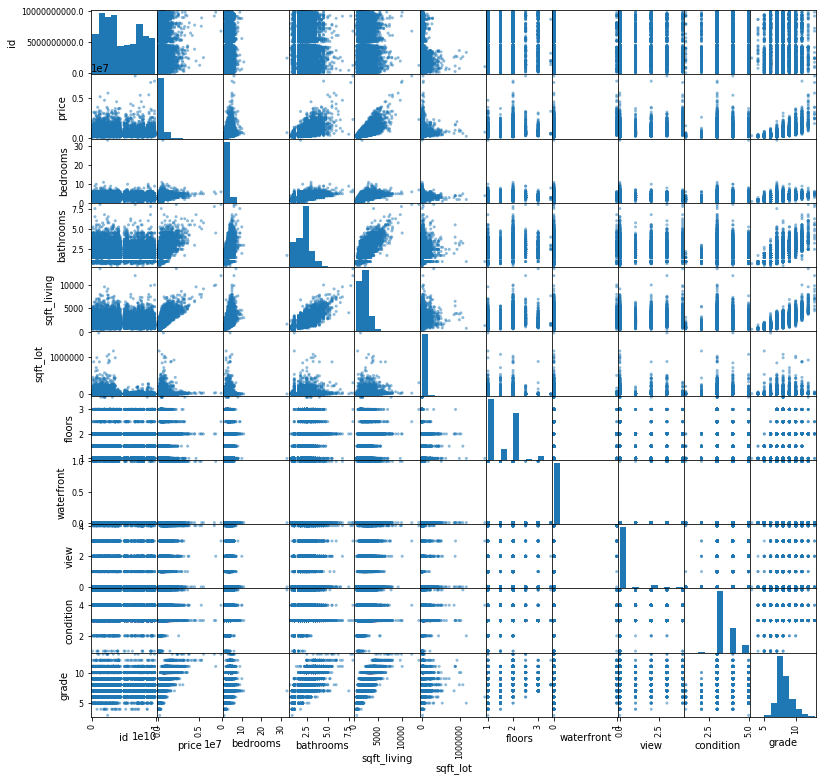

In [42]:
pd.plotting.scatter_matrix(mini_df2,figsize  = [13, 13]);

In [43]:
mini_df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896


In [44]:
abs(mini_df2.corr())>0.65

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,True,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,True
bedrooms,False,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,True
sqft_living,False,True,False,True,True,False,False,False,False,False,True
sqft_lot,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,False


It looks like "grade" could also be a good predictor of price, as it is the only variable besides sqft_living with a correlation greater than 0.65. Let's take a look at the scatter plot.

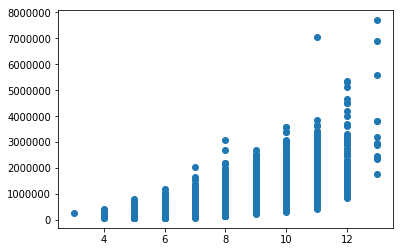

In [45]:
plt.scatter(mini_df2['grade'],mini_df2['price'])

The relationship looks like it could be linear, but clearly this is a categorical variable and need to be analyzed as such. Further below I will bin and one-hot-encode this variable to make it usable for regression.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD4804BAC8>,
      dtype=object)

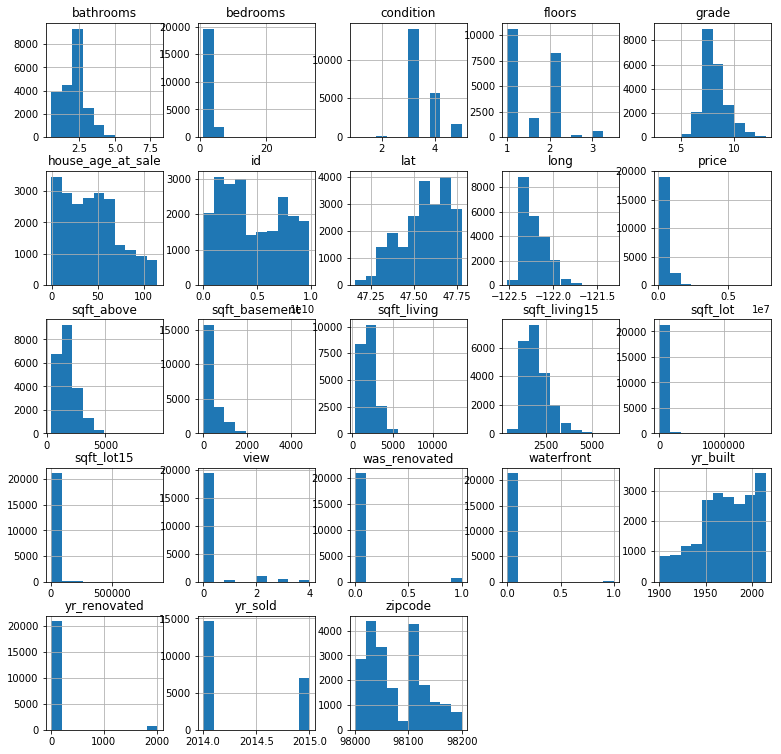

In [46]:
# Then, we'll take another look at the data to see which variables will need log transformations for normalization purposes

df.hist(figsize  = [13, 13])

## Conclusions after cursory EDA over all predictors

1. **CATEGORICAL VARIALBES**: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, house_age_at_sale
2. **CONTINUOUS VARIABLES**: sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot
3. **BINARY VARIABLES**: was_renovated
4. **UNIMPORTANT VARIALBES**: id, lat, long, zipcode, view

-- Categorical variables will need to be binned and one-hot encoded before modeling

-- Since none of the continuous variables above appear to be normally distributed, we may need to log transform them (thereby forcing them into a more normal distribution) in order to get accurate regression results.

# <font color='green'> Question 1 ANSWER:</font> Using scatter plots and correlation matrices to quickly look through the data,  sqft_living and grade appear to have the greatest influence on price. However- these correlation matrices above do not return meaningful results for categorical variables because they are being treated as continuous variables. 

# <font color='green'> Question 2: </font> When binning our categorical variables, particularly grade (which appears to be highly correlated with price), what are the best bin sizes to use? How do we ensure our bins are ideally spaced for regression analysis? Grade also looks like it could be a continuous variable- given it's meaning does it make more sense at continuous or categorical?

## Dealing with Categorical Variables

Here, I will put the cateogrical values into bins and perform one hot encoding to make them usable for regression. The binning is somewhat subjective and I split each variable into bins that satisfied 2 requirements.
1. Bins must be useful for interpreting regression results
2. Bins must each contain enough data to make regression results meaningful

In [47]:
# This is a copy DF to bin categorical variables
# CATEGORICAL VARIALBES: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, MAYBE house_age_at_sale
cat_df = df.copy()
cat_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [48]:
# Binning 'grade' column
cat_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

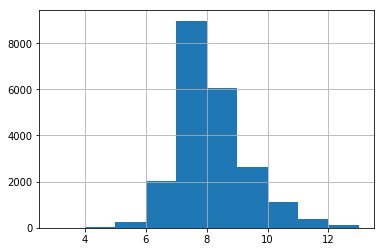

In [49]:
cat_df['grade'].hist()

In [50]:
#I ended up using more bins for grade than any other cateogrical variable, because each grade has unique qualitative
#attributes and grade (from our analysis above) seemed to be highly correlated to price.

#Creating equal-ish bins
bins_g = [0, 5, 6, 7, 8, 9, 10, 13]
bins_grade = pd.cut(cat_df['grade'], bins_g)

#Transform this to ordered categories
bins_grade = bins_grade.cat.as_unordered()


I ended up using more bins for grade than any other cateogrical variable, because each grade has unique qualitative attributes and grade (from our analysis above) seemed to be highly correlated to price.

Text(0, 0.5, '# of Homes')

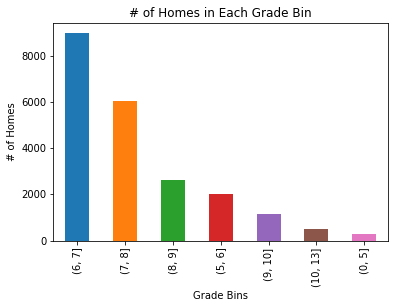

In [51]:
#Let's see if that made even-ish bins
bins_grade.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Grade Bin")
plt.xlabel("Grade Bins")
plt.ylabel("# of Homes")

# <font color='green'> Question 2 ANSWER: </font> I determined through reading Kings County documentation on the meaning of each grade, that there are too many qualitative features for it to operate as a continuous variable. i.e. grade 12 is not equivalent to double grade 6. <br> <br> Furthermore, each grade number besides 3, 4, 12, and 13 seem to have a good number of observations (>1000) which should make regression on this scale viable. 

In [52]:
# Same thing for bathrooms
cat_df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [53]:
# Creating equal-ish bins
bins_b = [0, 1.5, 2.25, 3, 8]
bins_bathrooms = pd.cut(cat_df['bathrooms'], bins_b)

#Transform this to ordered categories
bins_bathrooms = bins_bathrooms.cat.as_unordered()



Text(0, 0.5, '# of Homes')

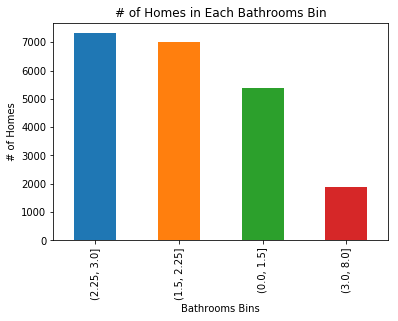

In [54]:
#Let's see if that made even-ish bins
bins_bathrooms.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Bathrooms Bin")
plt.xlabel("Bathrooms Bins")
plt.ylabel("# of Homes")

In [55]:
# Let's do it again for bedrooms
cat_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [56]:


# Creating equal-ish bins
bins_bed = [0, 2, 3, 4, 34] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_bedrooms = pd.cut(cat_df['bedrooms'], bins_bed)

#Transform this to ordered categories
bins_bedrooms = bins_bedrooms.cat.as_unordered()



Text(0, 0.5, '# of Homes')

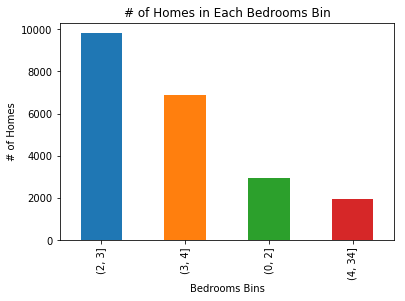

In [57]:
#Let's see if that made even-ish bins
bins_bedrooms.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Bedrooms Bin")
plt.xlabel("Bedrooms Bins")
plt.ylabel("# of Homes")

In [58]:
# Again! This time for condition
cat_df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [59]:
# Creating equal-ish bins
bins_cond = [0, 2, 3, 4, 5] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_condition = pd.cut(cat_df['condition'], bins_cond)

#Transform this to ordered categories
bins_condition = bins_condition.cat.as_unordered()



Text(0, 0.5, '# of Homes')

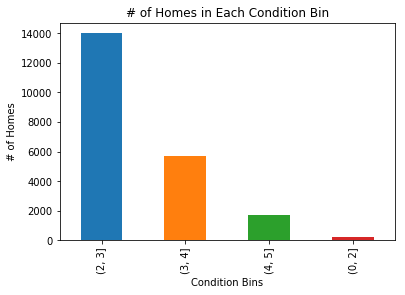

In [60]:
#Let's see if that made even-ish bins
bins_condition.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Condition Bin")
plt.xlabel("Condition Bins")
plt.ylabel("# of Homes")

In [61]:
# Again! BUT FOR FLOORS
cat_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [62]:
# Creating equal-ish bins
bins_f = [0, 1, 2, 4] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_floors = pd.cut(cat_df['floors'], bins_f)

#Transform this to ordered categories
bins_floors = bins_floors.cat.as_unordered()



Text(0, 0.5, '# of Homes')

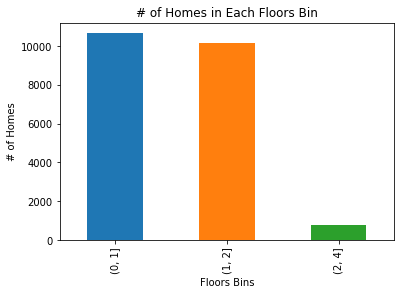

In [63]:
#Let's see if that made even-ish bins
bins_floors.value_counts().plot(kind='bar')
plt.title("# of Homes in Each Floors Bin")
plt.xlabel("Floors Bins")
plt.ylabel("# of Homes")

<font color = 'blue'>Here- I decided that I won't use yr_built or yr_renovated. Instead, I'll use house_age_at_sale which makes more sense as it combines yr_built and yr_sold</font>

In [64]:
#Final binning for house age at sale
cat_df['house_age_at_sale'].describe()

count    21597.000000
mean        43.323286
std         29.377285
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: house_age_at_sale, dtype: float64

In [65]:
# Creating equal-ish bins
bins_h = [0, 20, 40, 60, 120] #Used personal discretion and value_counts above to come up with equal-ish ranges
bins_house_age = pd.cut(cat_df['house_age_at_sale'], bins_h)

#Transform this to ordered categories
bins_house_age = bins_house_age.cat.as_unordered()



Text(0, 0.5, '# of Homes')

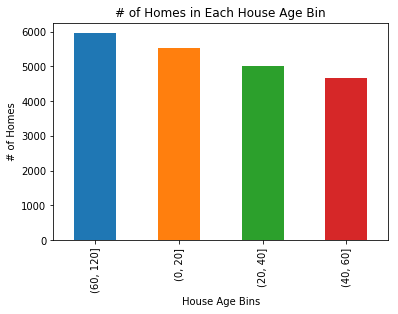

In [66]:
#Let's see if that made even-ish bins
bins_house_age.value_counts().plot(kind='bar')
plt.title("# of Homes in Each House Age Bin")
plt.xlabel("House Age Bins")
plt.ylabel("# of Homes")

In [67]:
# Setting up dummy variables 
# CATEGORICAL VARIALBES: bathrooms, bedrooms, condition, floors, grade, yr_built, yr_renovated, MAYBE house_age_at_sale

grade_dummy = pd.get_dummies(bins_grade, prefix="GRADE")
bathrooms_dummy = pd.get_dummies(bins_bathrooms, prefix="BATHROOMS")
bedrooms_dummy = pd.get_dummies(bins_bedrooms, prefix="BEDROOMS")
condition_dummy = pd.get_dummies(bins_condition, prefix="CONDITION")
floors_dummy = pd.get_dummies(bins_floors, prefix="FLOORS")
house_age_dummy = pd.get_dummies(bins_house_age, prefix="HOUSE_AGE")

#Note- I will pull these dummies directly LATER into the final_df that I use for regression

In [68]:
# Drop the original column and put in our dummy column

cat_df = cat_df.drop(['grade'], axis=1)
cat_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,yr_sold,house_age_at_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,2015,28


In [69]:
# Here, I add the columns to our cat_df to make sure the dummies are working properly. Note that I will not use this df for
# regression.

cat_df = pd.concat([cat_df, grade_dummy, bathrooms_dummy, bedrooms_dummy, condition_dummy, floors_dummy, house_age_dummy], axis=1)


In [70]:
cat_df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'was_renovated', 'yr_sold', 'house_age_at_sale', 'GRADE_(0, 5]',
       'GRADE_(5, 6]', 'GRADE_(6, 7]', 'GRADE_(7, 8]', 'GRADE_(8, 9]',
       'GRADE_(9, 10]', 'GRADE_(10, 13]', 'BATHROOMS_(0.0, 1.5]',
       'BATHROOMS_(1.5, 2.25]', 'BATHROOMS_(2.25, 3.0]',
       'BATHROOMS_(3.0, 8.0]', 'BEDROOMS_(0, 2]', 'BEDROOMS_(2, 3]',
       'BEDROOMS_(3, 4]', 'BEDROOMS_(4, 34]', 'CONDITION_(0, 2]',
       'CONDITION_(2, 3]', 'CONDITION_(3, 4]', 'CONDITION_(4, 5]',
       'FLOORS_(0, 1]', 'FLOORS_(1, 2]', 'FLOORS_(2, 4]',
       'HOUSE_AGE_(0, 20]', 'HOUSE_AGE_(20, 40]', 'HOUSE_AGE_(40, 60]',
       'HOUSE_AGE_(60, 120]'], dtype=object)

# <font color='green'> Question 3: </font> Do our continuous variables meet the normality assumption required for effective linear regression? Will log transforming them ensure this normality?

## Transforming continuous variables

Below, I perform more in-depth EDA over the continuous variables, and then decide to log-transform them in order to reduce skewness and approach normality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD4A11DBA8>,
      dtype=object)

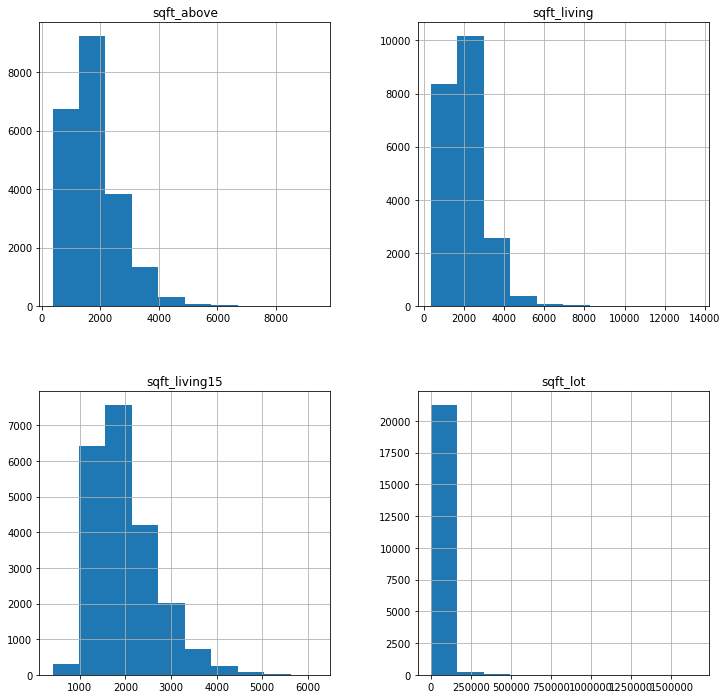

In [71]:
# First, I check out what the distribution looks like before transformation. 
df[['sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot']].hist(figsize = [12,12])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD4B919908>,
      dtype=object)

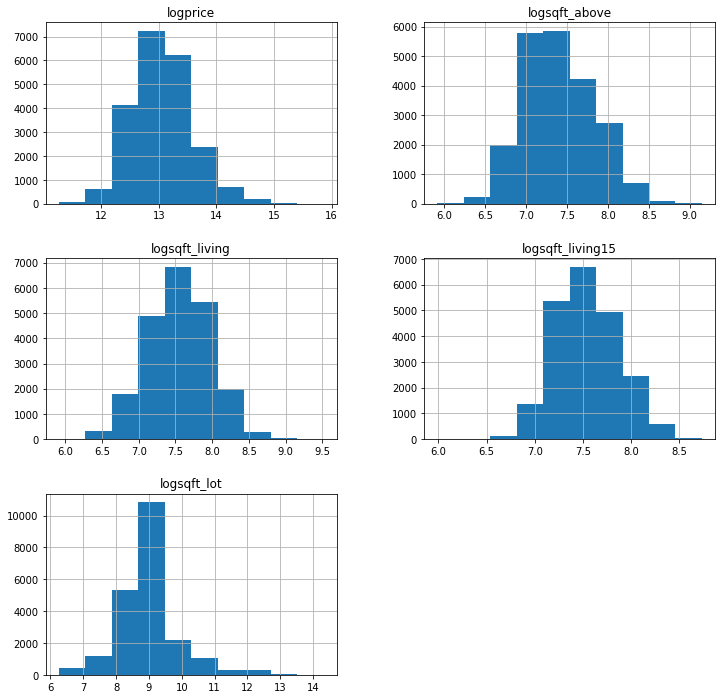

In [72]:
# Putting log transformations into their own dataframe and plotting histograms

data_log = pd.DataFrame([])
data_log['logprice'] = np.log(df['price'])
data_log['logsqft_above'] = np.log(df['sqft_above'])
#data_log['logsqft_basement'] = np.log(df['sqft_basement']) #Includes 0 values, therefore commented out
data_log['logsqft_living'] = np.log(df['sqft_living'])
data_log['logsqft_living15'] = np.log(df['sqft_living15'])
data_log['logsqft_lot'] = np.log(df['sqft_lot'])

data_log.hist(figsize=[12,12])


# <font color='green'> Question 3 ANSWER:</font> After transformation, all four of these continuous variables appear much better suited to a normal distribution than before. Keep in mind that this transformation will change the interpretation of the coefficients during regression.

In [73]:
## Below I assemble the different elements that will make up the final dataframe I use for regression (first iterations)

# First we create the log variables

log_sqft_above = np.log(df['sqft_above'])
log_sqft_living = np.log(df['sqft_living'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot = np.log(df['sqft_lot'])

# Then we'll use min-max scaling on all of our variables

# scaled_sqft_above = (log_sqft_above-min(log_sqft_above)) / (max(log_sqft_above) -min(log_sqft_above))
# scaled_sqft_living = (log_sqft_living-min(log_sqft_living)) / (max(log_sqft_living) -min(log_sqft_living))
# scaled_sqft_living15 = (log_sqft_living15-min(log_sqft_living15)) / (max(log_sqft_living15) -min(log_sqft_living15))
# scaled_sqft_lot = (log_sqft_lot-min(log_sqft_lot)) / (max(log_sqft_lot) -min(log_sqft_lot))

# Using standardization scaling
scaled_sqft_above = (log_sqft_above-np.mean(log_sqft_above)) / np.sqrt(np.var(log_sqft_above))
scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living)) / np.sqrt(np.var(log_sqft_living))
scaled_sqft_living15 = (log_sqft_living15-np.mean(log_sqft_living15)) / np.sqrt(np.var(log_sqft_living15))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot)) / np.sqrt(np.var(log_sqft_lot))

data_final = pd.DataFrame([])
data_final['log_sqft_above'] = scaled_sqft_above
data_final['log_sqft_living'] = scaled_sqft_living
data_final['log_sqft_living15'] = scaled_sqft_living15
data_final['log_sqft_lot'] = scaled_sqft_lot

# Bringing in the categorical variables...

grade_dummies = pd.get_dummies(bins_grade, prefix="GRADE")
bathrooms_dummies = pd.get_dummies(bins_bathrooms, prefix="BATHROOMS")
bedrooms_dummies = pd.get_dummies(bins_bedrooms, prefix="BEDROOMS")
condition_dummies = pd.get_dummies(bins_condition, prefix="CONDITION")
floors_dummies = pd.get_dummies(bins_floors, prefix="FLOORS")
house_age_dummies = pd.get_dummies(bins_house_age, prefix="HOUSE_AGE") # REMOVED THIS FOR REASONS explained below

# Our dependent variable- LOG TRANSFORMED (reasons explained in question 4 below)
logprice = np.log(df['price'])

#TESTING scaling dependent variable
#scaledlogprice = (logprice-np.mean(logprice)) / np.sqrt(np.var(logprice))

# Concat it all together
data_final = pd.concat([logprice, data_final, grade_dummies, 
                        bathrooms_dummies, bedrooms_dummies, condition_dummies, floors_dummies, house_age_dummies], axis=1)

# <font color='green'> Question 4: </font> Having now transformed our continuous independent variables, does it also make sense to transform our dependent variable for normality?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD4B808710>,
      dtype=object)

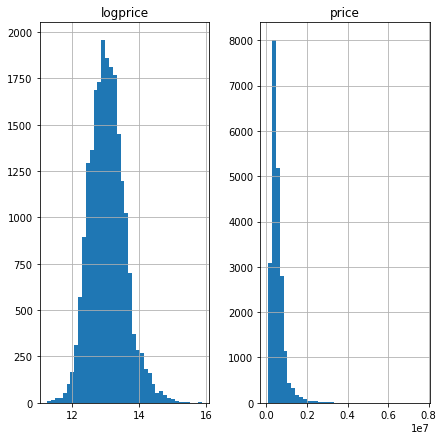

In [74]:
#Let's look at histograms of each and see how they compare in terms of normality
df_comparison = pd.DataFrame([])
df_comparison['price'] = df['price']
df_comparison['logprice'] = np.log(df['price'])
df_comparison.hist(figsize=[7,7], bins=40)

As we can clearly see- logprice is much closer to a normal distribution, and therefore a better dependent variable for our model.

# <font color='green'> Question 4 Answer: </font> As I began my regression experiments below, I found that I was getting very low correlation between price and my transformed independent continuous variables. As the above histograms illustrate, part of the reason for this is that the dependent variable price is skewed pretty significantly to the right, which may be affecting correlation scores. 

In [75]:
# Let's give it a look!
data_final.head()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,-0.753583,-1.125582,-1.035453,-0.388439,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0.672709,0.709463,-0.326789,-0.113243,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,-1.752995,-2.131943,1.126531,0.244481,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,-1.026858,0.070676,-0.990210,-0.523926,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0.073516,-0.292732,-0.134221,0.008140,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


 <head><font color=red> NOTE: This excludes was_renovated and view variables, because they both are too insignificantly related to price, and there is not enough variation in values to make their analysis worth it (too many 0s)</font></head>

### First, we'll check out our correlation matrix for our newly transformed continous variables

In [76]:
continuous_df = data_final.iloc[:,:5]
continuous_df.corr()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot
price,1.000000,0.586013,0.674802,0.607154,0.138261
log_sqft_above,0.586013,1.000000,0.864979,0.713102,0.318663
log_sqft_living,0.674802,0.864979,1.000000,0.746836,0.325983
log_sqft_living15,0.607154,0.713102,0.746836,1.000000,0.363743
log_sqft_lot,0.138261,0.318663,0.325983,0.363743,1.000000


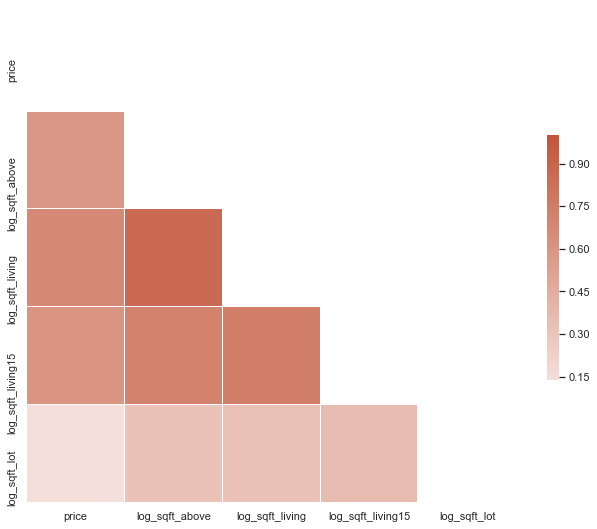

In [77]:
# Let's make a more beatiful correlation matrix
sns.set(style="white")
corr = continuous_df.corr()

# Generate a mask the size of our correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Correlation Matrix Takeaways

Correlations are pretty good between price and all of our continous log variables except for log_sqft_lot. log_sqft above is also highly correlated with log_sqft_living. This is unsurprising, because so few of the houses have basement square footage information. As such, we'll remove log_sqft_above from our analysis

# <font color='red'> Modeling the Data

# <font color='green'> Question 5: </font> Now that variables have been transformed, which predictors return the best regression results? Which predictors will we ultimately want to include in our final model?

# Let's start modeling- here we'll try our first regressions

In [78]:
# First, we'll do individual regressions for each variable- note price has been log transformmed.

col_names = continuous_df.describe().columns.drop(['price'])
results_log = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = sm.ols(formula=f, data=continuous_df).fit()
    X_new = pd.DataFrame({val: [continuous_df[val].min(), continuous_df[val].max()]});
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results_log[idx+1])

price~log_sqft_above
------------------------------
['log_sqft_above', 0.3434109763900405, 13.048210941923877, 0.3085607139980395, 0.0]
price~log_sqft_living
------------------------------
['log_sqft_living', 0.45535727584899854, 13.04821094192388, 0.3553118441824262, 0.0]
price~log_sqft_living15
------------------------------
['log_sqft_living15', 0.3686357627771213, 13.04821094192383, 0.3196923745400803, 0.0]
price~log_sqft_lot
------------------------------
['log_sqft_lot', 0.01911602756307318, 13.048210941923958, 0.07280016584265336, 1.2147387791189734e-92]


In [79]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,log_sqft_above,0.343411,13.0482,0.308561,0
2,log_sqft_living,0.455357,13.0482,0.355312,0
3,log_sqft_living15,0.368636,13.0482,0.319692,0
4,log_sqft_lot,0.019116,13.0482,0.0728002,1.21474e-92


We can see that log_sqft_living seems to have the highest r squared value

## <font color='blue'> For our initial model, we will drop log_sqft_above and log_sft_living 15 as they both appear to be highly correlated with log_sqft_living (multicollinearity), which is our best predictor for price </font>

Text(0, 0.5, 'logprice')

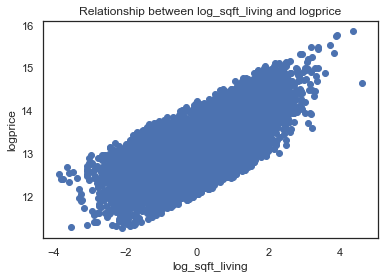

In [80]:
#Relationship between sqft_living and price still looking good after transformation/standardization
plt.scatter(continuous_df['log_sqft_living'], continuous_df['price'])
plt.title("Relationship between log_sqft_living and logprice")
plt.xlabel("log_sqft_living")
plt.ylabel("logprice")

# Regression for 3 continous variables we're going to use- first time using statsmodels.

In [81]:
#Regression including just the continous variables....
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
formula = "price ~ log_sqft_living+log_sqft_living15+log_sqft_lot"
model_cont = ols(formula= formula, data=data_final).fit()

In [83]:
model_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     7011.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:54:32   Log-Likelihood:                -9448.0
No. Observations:               21597   AIC:                         1.890e+04
Df Residuals:                   21593   BIC:                         1.894e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.0482      0.003   5116.285      0.000      13.043      13.053
log_sqft_living       0.2718      0.004     70.601      0.000       0.264       0.279
log_sqft_living15     0.1411      0.004     36.118      0.000       0.133       0.149
log_sqft_lot         -0.0671      0.003    -24.426      0.000      -0.073      -0.062
==============================================================================
Omnibus:                       73.854   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.764
Skew:                           0.107   Prob(JB):                     1.17e-15
Kurtosis:                       2.826   Cond. No.                         2.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
data_final.head()

,price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,-0.753583,-1.125582,-1.035453,-0.388439,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0.672709,0.709463,-0.326789,-0.113243,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,-1.752995,-2.131943,1.126531,0.244481,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,-1.026858,0.070676,-0.990210,-0.523926,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0.073516,-0.292732,-0.134221,0.008140,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0


 ## <font color = 'red'>NOW DOING THE SAME FOR CATEGORICAL VARIABLES </font>

In [85]:
# Now we'll run individual regression for each of our categorical variables

In [86]:
cat_df = pd.concat([logprice, data_final.iloc[:,5:]], axis=1)
cat_df.head()

,price,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]","BATHROOMS_(1.5, 2.25]",...,"CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]","HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,12.309982,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,13.195614,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,12.100712,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,13.311329,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,13.142166,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [87]:
grade_df = cat_df.iloc[:,1:8]
bathrooms_df = cat_df.iloc[:,8:12]
bedrooms_df = cat_df.iloc[:,12:16]
condition_df = cat_df.iloc[:,16:20]
floors_df = cat_df.iloc[:,20:23]
houseage_df = cat_df.iloc[:,23:27]


## <font color='blue'> Individual Regression for Categorical Variables </font>

In [88]:
# Linear regression performed for all categorical data

dfs = [grade_df, bathrooms_df, bedrooms_df, condition_df, floors_df, houseage_df]
for data in dfs:
    X = data
    y = pd.DataFrame(data_final['price'])
    X_int = sm.add_constant(X)
    model_all = sm.OLS(y, X_int).fit()
    print(model_all.summary())
X_int


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3512.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:54:32   Log-Likelihood:                -9437.0
No. Observations:               21597   AIC:                         1.889e+04
Df Residuals:                   21590   BIC:                         1.894e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5422      0.004   2803.

,const,"HOUSE_AGE_(0, 20]","HOUSE_AGE_(20, 40]","HOUSE_AGE_(40, 60]","HOUSE_AGE_(60, 120]"
0,1.0,0,0,1,0
1,1.0,0,0,0,1
2,1.0,0,0,0,1
3,1.0,0,0,1,0
4,1.0,0,1,0,0
5,1.0,1,0,0,0
6,1.0,1,0,0,0
7,1.0,0,0,1,0
8,1.0,0,0,1,0
9,1.0,1,0,0,0


## <font color='blue'> Grade, bathrooms, and bedrooms seem to be the best indicators of price based on R squared values. We'll drop house_age from our final model because it has an r-squared of less than 0.1</font>

To see how all of our data is looking, let's try running a regression for ALL of the variables we have elected not to drop: both categorical and continuous

In [89]:
#Regression for all 

#Here I drop the columns that were discussed dropping above and put the other predictors into a new dataframe
X = data_final.drop(['price', 'log_sqft_living15', 'log_sqft_above', 'HOUSE_AGE_(0, 20]',
                    'HOUSE_AGE_(20, 40]','HOUSE_AGE_(40, 60]','HOUSE_AGE_(60, 120]',], axis=1)

#Putting price in it's own dataframe
y = pd.DataFrame(data_final['price'])
X.head()


,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
0,-1.125582,-0.388439,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0.709463,-0.113243,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-2.131943,0.244481,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0.070676,-0.523926,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,-0.292732,0.008140,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [90]:
X_int = sm.add_constant(X)
model_all = sm.OLS(y, X_int).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1620.
Date:                Mon, 11 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:54:32   Log-Likelihood:                -7220.1
No. Observations:               21597   AIC:                         1.448e+04
Df Residuals:                   21577   BIC:                         1.464e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.9410      0.004   1586.957      0.000       5.934       5.948
log_sqft_living           0.2467      0.005     49.921      0.000       0.237       0.256
log_sqft_lot             -0.0417      0.003    -15.131      0.000      -0.047      -0.036
GRADE_(0, 5]              0.3238      0.020     16.475      0.000       0.285       0.362
GRADE_(5, 6]              0.4460      0.009     48.020      0.000       0.428       0.464
GRADE_(6, 7]              0.6154      0.006    103.043      0.000       0.604       0.627
GRADE_(7, 8]              0.8062      0.006    134.444      0.000       0.794       0.818
GRADE_(8, 9]              1.0378      0.008    135.300      0.000       1.023       1.053
GRADE_(9, 10]             1.2331      0.011    115.618      0.000       1.212       1.254
GRADE_(10, 13]            1.4787      0.016     93.577      0.000       1.448       1.510
BATHROOMS_(0.0, 1.5]      1.5205      0.006    238.201      0.000       1.508       1.533
BATHROOMS_(1.5, 2.25]     1.4834      0.005    322.854      0.000       1.474       1.492
BATHROOMS_(2.25, 3.0]     1.4074      0.005    311.978      0.000       1.399       1.416
BATHROOMS_(3.0, 8.0]      1.5297      0.008    188.321      0.000       1.514       1.546
BEDROOMS_(0, 2]           1.6069      0.007    239.192      0.000       1.594       1.620
BEDROOMS_(2, 3]           1.4499      0.004    368.937      0.000       1.442       1.458
BEDROOMS_(3, 4]           1.4300      0.004    318.954      0.000       1.421       1.439
BEDROOMS_(4, 34]          1.4542      0.007    201.894      0.000       1.440       1.468
CONDITION_(0, 2]          1.3519      0.019     71.196      0.000       1.315       1.389
CONDITION_(2, 3]          1.4198      0.006    222.875      0.000       1.407       1.432
CONDITION_(3, 4]          1.5170      0.007    223.451      0.000       1.504       1.530
CONDITION_(4, 5]          1.6523      0.009    194.221      0.000       1.636       1.669
FLOORS_(0, 1]             1.9474      0.005    372.344      0.000       1.937       1.958
FLOORS_(1, 2]             1.9563      0.005    418.699      0.000       1.947       1.965
FLOORS_(2, 4]             2.0373      0.009    215.228      0.000       2.019       2.056
==============================================================================
Omnibus:                       37.584   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.010
Skew:                           0.095   Prob(JB):                     5.58e-09
Kurtosis:                       3.080   Cond. No.                     3.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

Doesn't look too bad! For our first model, we've included ALL of our predictors and we got an R^2 value of .588. It's plausible that all of our variables are good enough predictors to be included in our model at this point.

# <font color='green'> Question 5 ANSWER: </font> Before recursive feature elminiation and train-test-split, the best predictors of price (really logprice) are as follows: sqft_living, grade, bedrooms, bathrooms.

## Recursive Feature Elimination

Here- we'll use SKLearn's recursive feature elimination to experiment with which predictors are best

In [91]:
X2 = data_final.drop(['price', 'log_sqft_living15', 'log_sqft_above', 'HOUSE_AGE_(0, 20]',
                    'HOUSE_AGE_(20, 40]','HOUSE_AGE_(40, 60]','HOUSE_AGE_(60, 120]',], axis=1)
y2 = pd.DataFrame(data_final['price'])


In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Selecting the 15 best features
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 24)
selector = selector.fit(X2, np.ravel(y2))

In [93]:
# Storing whether each variable was selected in a list
selected_or_not = list(selector.support_)
ranking = list(selector.ranking_)
estimators = selector.estimator_
selected_or_not

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [94]:
# Snagging column names
predictor_columns = list(X2.columns)

In [95]:
# Creating a results dataframe
recursive_results_df = pd.DataFrame(list([selected_or_not, ranking]), columns=predictor_columns)
recursive_results_df.rename(index={0:'Selected?', 1:'Ranking'}, inplace=True)
recursive_results_df


,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
Selected?,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Ranking,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [96]:
# Creating a list of coefficients spread out correctly so I can insert into recursive_results_df
coefficients = list(estimators.coef_)
print(coefficients)
coefficient_list = []
i=0
for index in range(0, len(predictor_columns)):
    if recursive_results_df.iloc[0,index]:
        coefficient_list.append(coefficients[i])
        i+=1
    else:
        coefficient_list.append(0)
        
print(coefficient_list)

coefficient_df = pd.DataFrame([coefficient_list], columns=predictor_columns)
recursive_results_df = pd.concat([recursive_results_df, coefficient_df], axis=0)
recursive_results_df

[0.2466657022355795, -0.041729168591886245, -0.5249641264308211, -0.40269561607345195, -0.23330153161047285, -0.042512310976915664, 0.18912009481517378, 0.3843467780050833, 0.6300067122714058, 0.03521766916486173, -0.0018056276986026876, -0.07785237522953431, 0.044440333763275414, 0.12163541226929227, -0.03535012721299564, -0.055279308676574136, -0.03100597637972299, -0.13332206322250123, -0.06544609993636918, 0.031743878660019036, 0.1670242844988509, -0.03289806911903097, -0.02407546851428987, 0.05697353763332089]
[0.2466657022355795, -0.041729168591886245, -0.5249641264308211, -0.40269561607345195, -0.23330153161047285, -0.042512310976915664, 0.18912009481517378, 0.3843467780050833, 0.6300067122714058, 0.03521766916486173, -0.0018056276986026876, -0.07785237522953431, 0.044440333763275414, 0.12163541226929227, -0.03535012721299564, -0.055279308676574136, -0.03100597637972299, -0.13332206322250123, -0.06544609993636918, 0.031743878660019036, 0.1670242844988509, -0.03289806911903097, -

,log_sqft_living,log_sqft_lot,"GRADE_(0, 5]","GRADE_(5, 6]","GRADE_(6, 7]","GRADE_(7, 8]","GRADE_(8, 9]","GRADE_(9, 10]","GRADE_(10, 13]","BATHROOMS_(0.0, 1.5]",...,"BEDROOMS_(2, 3]","BEDROOMS_(3, 4]","BEDROOMS_(4, 34]","CONDITION_(0, 2]","CONDITION_(2, 3]","CONDITION_(3, 4]","CONDITION_(4, 5]","FLOORS_(0, 1]","FLOORS_(1, 2]","FLOORS_(2, 4]"
Selected?,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Ranking,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,0.246666,-0.0417292,-0.524964,-0.402696,-0.233302,-0.0425123,0.18912,0.384347,0.630007,0.0352177,...,-0.0353501,-0.0552793,-0.031006,-0.133322,-0.0654461,0.0317439,0.167024,-0.0328981,-0.0240755,0.0569735


In [97]:
recursive_results_df.rename(index={0:'Coefficient'}, inplace=True)


In [98]:
recursive_results_df = recursive_results_df.transpose()


In [99]:
recursive_results_df

,Selected?,Ranking,Coefficient
log_sqft_living,True,1,0.246666
log_sqft_lot,True,1,-0.0417292
"GRADE_(0, 5]",True,1,-0.524964
"GRADE_(5, 6]",True,1,-0.402696
"GRADE_(6, 7]",True,1,-0.233302
"GRADE_(7, 8]",True,1,-0.0425123
"GRADE_(8, 9]",True,1,0.18912
"GRADE_(9, 10]",True,1,0.384347
"GRADE_(10, 13]",True,1,0.630007
"BATHROOMS_(0.0, 1.5]",True,1,0.0352177


In [100]:
selected_predictors_df = recursive_results_df.loc[recursive_results_df['Selected?'] == True]
selected_predictors_df

,Selected?,Ranking,Coefficient
log_sqft_living,True,1,0.246666
log_sqft_lot,True,1,-0.0417292
"GRADE_(0, 5]",True,1,-0.524964
"GRADE_(5, 6]",True,1,-0.402696
"GRADE_(6, 7]",True,1,-0.233302
"GRADE_(7, 8]",True,1,-0.0425123
"GRADE_(8, 9]",True,1,0.18912
"GRADE_(9, 10]",True,1,0.384347
"GRADE_(10, 13]",True,1,0.630007
"BATHROOMS_(0.0, 1.5]",True,1,0.0352177


In [101]:
# And of course we should pull our intercept value...
estimators.intercept_

13.22583200514804

# <font color='purple'> CONCLUSION: Our recursive feature elimination confirms what our individual regressions told us: that the very best predictors of price are log_sqft_living, grade, bathrooms, bedrooms, and condition </font>

## Here, I'll run a train-test-split that will determine the optimal number of features for the highest R^2 value

In [102]:
# Let's to a train test split for R-squared, increasing the number of selections by two each time.
linreg = LinearRegression()

r_list = []
adj_r_list = []
list_n = list(range(4,26,2))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


price    0.3884
dtype: float64
price    0.387719
dtype: float64
price    0.493945
dtype: float64
price    0.493382
dtype: float64
price    0.559387
dtype: float64
price    0.558896
dtype: float64
price    0.571886
dtype: float64
price    0.57141
dtype: float64
price    0.573925
dtype: float64
price    0.573451
dtype: float64
price    0.582397
dtype: float64
price    0.581932
dtype: float64
price    0.58705
dtype: float64
price    0.586591
dtype: float64
price    0.587818
dtype: float64
price    0.58736
dtype: float64
price    0.587821
dtype: float64
price    0.587363
dtype: float64
price    0.587866
dtype: float64
price    0.587407
dtype: float64
price    0.587866
dtype: float64
price    0.587407
dtype: float64


It seems that the more features we add, the higher the R^2 value. As such, I decided to keep all of the features I had in before

# 10 Fold cross validation with final model

In [103]:
#Using the 15 best predictors 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


select_15 = RFE(linreg, n_features_to_select = 24)
select_15 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

In [104]:
cv_10_results

array([-0.12055234, -0.12223942, -0.11673497, -0.11697417, -0.11432254,
       -0.11696837, -0.11623023, -0.12214012, -0.11990087, -0.08277133])

## <font color='purple'> Good! Our mean squared errors seem reasonable when using cross validation. For now I believe selecting all 24 predictors will generate the best model

# <font color='purple'> Below is the output for our final model which includes all 24 variables.

In [105]:
print(recursive_results_df)
model_intercept = estimators.intercept_

                      Selected? Ranking Coefficient
log_sqft_living            True       1    0.246666
log_sqft_lot               True       1  -0.0417292
GRADE_(0, 5]               True       1   -0.524964
GRADE_(5, 6]               True       1   -0.402696
GRADE_(6, 7]               True       1   -0.233302
GRADE_(7, 8]               True       1  -0.0425123
GRADE_(8, 9]               True       1     0.18912
GRADE_(9, 10]              True       1    0.384347
GRADE_(10, 13]             True       1    0.630007
BATHROOMS_(0.0, 1.5]       True       1   0.0352177
BATHROOMS_(1.5, 2.25]      True       1 -0.00180563
BATHROOMS_(2.25, 3.0]      True       1  -0.0778524
BATHROOMS_(3.0, 8.0]       True       1   0.0444403
BEDROOMS_(0, 2]            True       1    0.121635
BEDROOMS_(2, 3]            True       1  -0.0353501
BEDROOMS_(3, 4]            True       1  -0.0552793
BEDROOMS_(4, 34]           True       1   -0.031006
CONDITION_(0, 2]           True       1   -0.133322
CONDITION_(2

Below the I output the final model as a formula.

In [106]:
#Final model
recursive_results_df.iloc[0,2]

row_names = list(recursive_results_df.index)
mystring = "logprice(standardized) = 13.225832 + "
for row in range(0, len(row_names)):
    mystring += row_names[row]
    mystring += "*"
    mystring += str(recursive_results_df.iloc[row, 2])
    mystring += " + "

print(mystring)
#for 

logprice(standardized) = 13.225832 + log_sqft_living*0.2466657022355795 + log_sqft_lot*-0.041729168591886245 + GRADE_(0, 5]*-0.5249641264308211 + GRADE_(5, 6]*-0.40269561607345195 + GRADE_(6, 7]*-0.23330153161047285 + GRADE_(7, 8]*-0.042512310976915664 + GRADE_(8, 9]*0.18912009481517378 + GRADE_(9, 10]*0.3843467780050833 + GRADE_(10, 13]*0.6300067122714058 + BATHROOMS_(0.0, 1.5]*0.03521766916486173 + BATHROOMS_(1.5, 2.25]*-0.0018056276986026876 + BATHROOMS_(2.25, 3.0]*-0.07785237522953431 + BATHROOMS_(3.0, 8.0]*0.044440333763275414 + BEDROOMS_(0, 2]*0.12163541226929227 + BEDROOMS_(2, 3]*-0.03535012721299564 + BEDROOMS_(3, 4]*-0.055279308676574136 + BEDROOMS_(4, 34]*-0.03100597637972299 + CONDITION_(0, 2]*-0.13332206322250123 + CONDITION_(2, 3]*-0.06544609993636918 + CONDITION_(3, 4]*0.031743878660019036 + CONDITION_(4, 5]*0.1670242844988509 + FLOORS_(0, 1]*-0.03289806911903097 + FLOORS_(1, 2]*-0.02407546851428987 + FLOORS_(2, 4]*0.05697353763332089 + 


In [107]:
list(recursive_results_df.index)

['log_sqft_living',
 'log_sqft_lot',
 'GRADE_(0, 5]',
 'GRADE_(5, 6]',
 'GRADE_(6, 7]',
 'GRADE_(7, 8]',
 'GRADE_(8, 9]',
 'GRADE_(9, 10]',
 'GRADE_(10, 13]',
 'BATHROOMS_(0.0, 1.5]',
 'BATHROOMS_(1.5, 2.25]',
 'BATHROOMS_(2.25, 3.0]',
 'BATHROOMS_(3.0, 8.0]',
 'BEDROOMS_(0, 2]',
 'BEDROOMS_(2, 3]',
 'BEDROOMS_(3, 4]',
 'BEDROOMS_(4, 34]',
 'CONDITION_(0, 2]',
 'CONDITION_(2, 3]',
 'CONDITION_(3, 4]',
 'CONDITION_(4, 5]',
 'FLOORS_(0, 1]',
 'FLOORS_(1, 2]',
 'FLOORS_(2, 4]']

In [108]:
# Defining a formula that uses the final model and inputs to predict (I know this is ugly)
def mymodel(sqft_living_input, sqft_lot_input, grade, bathrooms, bedrooms, condition, floors):
    log_sqft_living_coef = recursive_results_df.iloc[0,2]
    log_sqft_lot_coef = recursive_results_df.iloc[1,2]
    GRADE_0_to_5_coef = 0
    GRADE_5_to_6_coef = 0
    GRADE_6_to_7_coef = 0
    GRADE_7_to_8_coef = 0
    GRADE_8_to_9coef = 0
    GRADE_9_to_10coef = 0
    GRADE_10_to_13coef = 0
    BATHROOMS_00_to_15coef = 0
    BATHROOMS_15_to_225coef = 0
    BATHROOMS_225_to_30coef = 0
    BATHROOMS_30_to_80coef = 0
    BEDROOMS_0_to_2coef = 0
    BEDROOMS_2_to_3coef = 0
    BEDROOMS_3_to_4coef = 0
    BEDROOMS_4_to_34coef = 0
    CONDITION_0_to_2coef = 0
    CONDITION_2_to_3coef = 0
    CONDITION_3_to_4coef = 0
    CONDITION_4_to_5coef = 0
    FLOORS_0_to_1coef = 0
    FLOORS_1_to_2coef = 0
    FLOORS_2_to_4coef = 0
    
    #Adjusting inputs to fit our transformed coefficients
    sqft_living_input_var = np.log(sqft_living_input)
    sqft_lot_input_var = np.log(sqft_lot_input)
    scaled_sqft_living_input = (sqft_living_input_var-np.mean(log_sqft_living)) / np.sqrt(np.var(log_sqft_living))
    scaled_sqft_lot_input = (sqft_lot_input_var-np.mean(log_sqft_lot)) / np.sqrt(np.var(log_sqft_lot))
    
    if grade <= 5:
        GRADE_0_to_5_coef = 1
    elif ((grade > 5) & (grade <=6)):
        GRADE_5_to_6_coef = 1
    elif ((grade > 6) & (grade <=7)):
        GRADE_6_to_7_coef = 1
    elif ((grade > 7) & (grade <=8)):
        GRADE_7_to_8_coef = 1      
    elif ((grade > 8) & (grade <=9)):
        GRADE_8_to_9_coef = 1
    elif ((grade > 9) & (grade <=10)):
        GRADE_9_to_10_coef = 1 
    elif (grade> 10):
        GRADE_10_to_13_coef = 1  
    
    if bathrooms <= 1.5:
        BATHROOMS_00_to_15_coef = 1
    elif ((bathrooms > 1.5) & (bathrooms <=2.25)):
        BATHROOMS_15_to_225_coef = 1
    elif ((bathrooms > 2.25) & (bathrooms <=3)):
        BATHROOMS_225_to_30_coef = 1
    elif ((bathrooms > 3)):
        BATHROOMS_30_to_80_coef = 1               

    if bedrooms <= 2:
        BEDROOMS_0_to_2_coef = 1
    elif ((bedrooms > 2) & (bedrooms <=3)):
        BEDROOMS_2_to_3_coef = 1
    elif ((bedrooms > 3) & (bedrooms <=4)):
        BEDROOMS_3_to_4_coef = 1
    elif ((bedrooms > 4)):
        BEDROOMS_4_to_34_coef = 1         

    if condition <= 2:
        CONDITION_0_to_2_coef = 1
    elif ((condition > 2) & (condition <=3)):
        CONDITION_2_to_3_coef = 1
    elif ((condition > 3) & (condition <=4)):
        CONDITION_3_to_4_coef = 1
    elif ((condition > 4)):
        CONDITION_4_to_34_coef = 1
        
    if floors <= 1:
        FLOORS_0_to_1_coef = 1
    elif ((floors > 1) & (floors <=2)):
        FLOORS_1_to_2_coef = 1
    elif ((floors > 2) & (floors <=4)):
        FLOORS_2_to_4_coef = 1
        
    #Pulling the list of variables that we will multiply our coefficients by
    to_multiply_list = (scaled_sqft_living_input, scaled_sqft_lot_input, GRADE_0_to_5_coef, GRADE_5_to_6_coef, GRADE_6_to_7_coef,
                       GRADE_7_to_8_coef, GRADE_8_to_9coef, GRADE_9_to_10coef, GRADE_10_to_13coef, BATHROOMS_00_to_15coef,
                       BATHROOMS_15_to_225coef, BATHROOMS_225_to_30coef, BATHROOMS_30_to_80coef, BEDROOMS_0_to_2coef,
                       BEDROOMS_2_to_3coef, BEDROOMS_3_to_4coef, BEDROOMS_4_to_34coef, CONDITION_0_to_2coef, CONDITION_2_to_3coef,
                       CONDITION_3_to_4coef, CONDITION_4_to_5coef, FLOORS_0_to_1coef, FLOORS_1_to_2coef, FLOORS_2_to_4coef)
    
    #Pulling the coefficients from our model
    coefficient_list = list(recursive_results_df.iloc[0:,2])
    
    product_list = []
    for predictor_var in range(0, 24):
        product_list.append((to_multiply_list[predictor_var])*(coefficient_list[predictor_var]))
    
    result_log_standardized_price = sum(product_list) + model_intercept
    
    return round(math.exp(result_log_standardized_price),2)


Time to test out the function! We'll try to predict the price for a house with 1180 square foot in the house, 5650 lot square footage, grade 7, 3 bathrooms, 3 bedrooms, 2 condition, and 2 floors.

In [109]:
mymodel(1180, 5650, 7, 3, 3, 2, 2)

338100.08

It works! Given those conditions, we predict a price of $338,100

# <font color='red'> Interpret the Results

## Explanation of final model

In our final model, we are able to take inputs of square footage of the house, square footage of the lot, the grade of the house, the # of bathrooms, the # of bedooms, the condition, and the # of floors and use that information to predict the price of any given house in the Kings County area. Both the independent and dependent variables have been significantly transformed and normalized, but I will attempt to explain how three of the coefficients from the model would be interpreted. 

## Interpretation examples of 3 coefficients

**log_sqft_living** = 0.246666. This means, that for every additional unit of standardized log_sqft_living, we predict the log of price to increase by 0.24666.
**grade_0_to_5** = -0.524964. This means, that if a house has a grade less than or equal to 5, we predict the log of price to decrease by 0.524964.
**bedrooms_2_to_3** = -0.0353501 This mean, if a house has has more than 2 but less than or equal to 3 bedrooms, we predict the log of price to decrease by 0.0353501.

## Seeing how closely our model predicts the price of a piece of data!

mymodel(sqft_living_input, sqft_lot_input, grade, bathrooms, bedrooms, condition, floors):

In [110]:
df.iloc[1,:]

id                            6414100192
date                 2014-12-09 00:00:00
price                             538000
bedrooms                               3
bathrooms                           2.25
sqft_living                         2570
sqft_lot                            7242
floors                                 2
waterfront                             0
view                                   0
condition                              3
grade                                  7
sqft_above                          2170
sqft_basement                        400
yr_built                            1951
yr_renovated                        1991
zipcode                            98125
lat                               47.721
long                            -122.319
sqft_living15                       1690
sqft_lot15                          7639
was_renovated                          1
yr_sold                             2014
house_age_at_sale                     63
Name: 1, dtype: 

In [111]:
model_results = mymodel(2570, 7242, 7, 2.25, 3, 3, 2)
model_results

525579.19

In [112]:
actual_results = df.loc[1,'price']
actual_results

538000.0

# <font color='purple'> Not too bad!

FIRST LINE OF CONCLUSION: R^2 value and THIS is why you need to look at the rest of the model. Using (predictor variables). Then conclusion should bea  recap of everything you did in your analysis- OSEMN overview.

INCLUDE future work paragraph explaining what the next steps for this dataset will be. 